## Programming Exercise 1 - Linear Regression

- [warmUpExercise](#warmUpExercise)
- [Linear regression with one variable](#Linear-regression-with-one-variable)
- [Gradient Descent](#Gradient-Descent)

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### warmUpExercise

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### Linear regression with one variable

In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

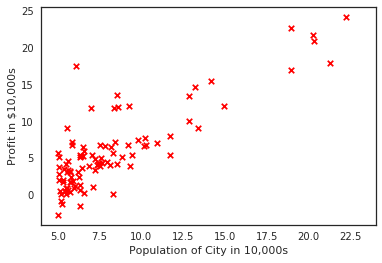

In [5]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### Gradient Descent

In [6]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [7]:
computeCost(X,y)

32.072733877455676

In [8]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        theta_history[iter, :] = theta.reshape((2, ))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history, theta_history)

theta:  [-3.63029144  1.16636235]


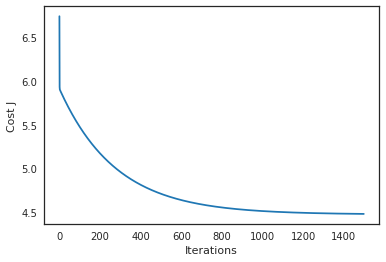

In [9]:
# theta for minimized cost J
theta , Cost_J, theta_history = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

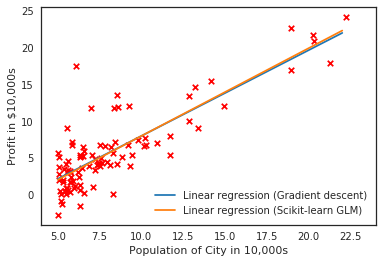

In [10]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [11]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


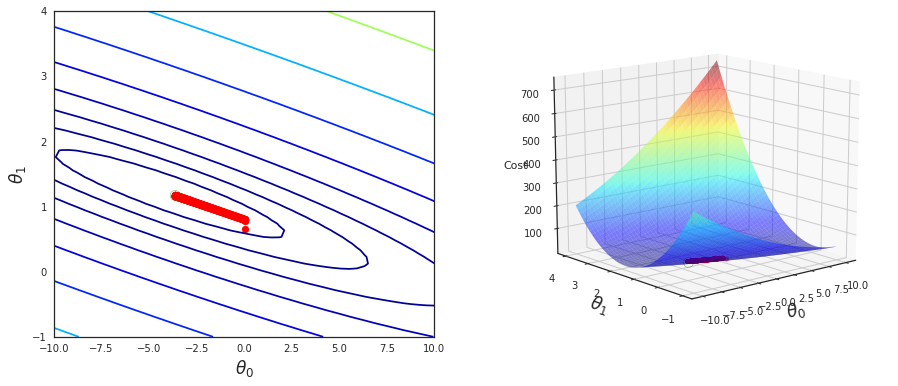

In [12]:
# visualizing J(theta)

# Create grid coordinates for plotting
theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

# Calculate J-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(J_vals):
    J_vals[i,j] = computeCost(X, y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta_history[:, 0],theta_history[:, 1], c='r')
ax1.scatter(theta_history[-1:, 0],theta_history[-1:, 1], facecolors='none', edgecolors='g', marker='o', s=100)

# Right plot
ax2.plot_surface(xx, yy, J_vals, rstride=1, cstride=1, alpha=0.5, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(J_vals.min(),J_vals.max())
ax2.scatter(theta_history[:, 0], theta_history[:, 1], Cost_J, c='r')
ax2.scatter(theta_history[-1:, 0], theta_history[-1:, 1], Cost_J[-1:], 
            facecolors='none', edgecolors='g', marker='o', s=100)
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

# Linear Regression With Multiple Variables

In [13]:
# loading data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = np.c_[ data[:, 0:2] ]
y = np.c_[ data[:, 2] ]
m = len(y)

# first 10 examples from dataset
print("x = {},\ny = {}".format(X[0:10, :], y[0:10, :]))

x = [[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]],
y = [[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]]


In [14]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    for i in np.arange(X.shape[1]):
        mu[0, i] = X[:, i].mean()
        X_norm[:, i] -= mu[0, i]
        sigma[0, i] = X[:, i].std()
        X_norm[:, i] /= sigma[0, i]
    return (X_norm, mu, sigma)

In [15]:
# Scale features and set them to zero mean
X, mu, sigma = featureNormalize(X)
# add intercept term to X
X = np.c_[ np.ones((m, 1)), X ]

In [16]:
# Gradient Descent
alpha = 0.01
num_iters = 400

In [17]:
def computeCostMulti(X, y, theta):
    m = len(y)
    J = 0
    J = 1/(2*m) * (X.dot(theta) - y).T.dot(X.dot(theta) - y)
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in np.arange(num_iters):
        theta -= (alpha / m) * X.T.dot(X.dot(theta) - y)
        J_history[i] = computeCostMulti(X, y, theta)
    return (theta, J_history)

In [18]:
# Init Theta and Run Gradient Descent
theta = np.zeros((3, 1))
(theta, J_history) = gradientDescentMulti(X, y, theta, alpha, num_iters)

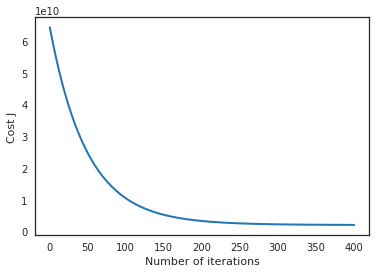

In [19]:
# Plot the convergence graph
plt.plot(np.arange(1, len(J_history)+1), J_history, linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [20]:
# Display gradient descent's result
print("Theta computed from gradient descent: \n")
print(" {} \n".format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
price = 0
price = np.c_[1, (1650 - mu[0, 0]) / sigma[0, 0], (3 - mu[0, 1]) / sigma[0, 1]].dot(theta)

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${}\n".format(price[0, 0]))

Theta computed from gradient descent: 

 [[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]] 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289221.5473712181



## Using Normal Equation

In [21]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = np.c_[ data[:, 0:2] ]
y = np.c_[ data[:, 2] ]
m = len(y)
# adding intercept term
X = np.c_[ np.ones((m, 1)), X ]

In [22]:
def normalEqn(X, y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [23]:
theta = normalEqn(X, y)
# Display normal equation's result
print("Theta computed from the normal equations: \n");
print(" {} \n".format(theta));

Theta computed from the normal equations: 

 [[ 89597.90954355]
 [   139.21067402]
 [ -8738.01911255]] 



In [24]:
price = np.c_[1, 1650, 3].dot(theta);
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n ${}\n".format(price[0, 0]));

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.4643349717

